In [74]:
#Importing necessary libraries
import pandas as pd
from pyspark.sql.functions import *
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np

In [75]:
path="s3://finalgeodata/"

In [76]:
#extracting devicestatus.txt from s3 bucket 
d = sc.textFile(path+"devicestatus.txt").map(lambda x: x.replace('|',',').replace('/',',').split(',')).toDF()

In [77]:
#renaming columns with useful names
df=d.select("_13","_14","_1","_2","_3").withColumnRenamed("_13", "latitude").withColumnRenamed("_14", "longitude").withColumnRenamed("_1", "date").withColumnRenamed("_2", "model").withColumnRenamed("_3", "deviceID")

In [78]:
#removing latitude and longitude roes which have values zero
df =df.filter((df.latitude!=0) & (df.longitude!=0))

In [79]:
#Seperating the model and manufacturer from column model
df=df.withColumn("manufacturer",split(df.model," ").getItem(0)).withColumn("model",split(df.model," ").getItem(1))

In [80]:
df.show()

+-------------+--------------+-------------------+-------+--------------------+------------+
|     latitude|     longitude|               date|  model|            deviceID|manufacturer|
+-------------+--------------+-------------------+-------+--------------------+------------+
|33.6894754264|-117.543308253|2014-03-15:10:10:20|   F41L|8cc3b47e-bd01-448...|    Sorrento|
|37.4321088904|-121.485029632|2014-03-15:10:10:20|    1.0|ef8c7564-0a1a-465...|      MeeToo|
|39.4378908349|-120.938978486|2014-03-15:10:10:20|    1.0|23eba027-b95a-472...|      MeeToo|
|39.3635186767|-119.400334708|2014-03-15:10:10:20|   F41L|707daba1-5640-4d6...|    Sorrento|
|33.1913581092|-116.448242643|2014-03-15:10:10:20|Novelty|db66fe81-aa55-43b...|       Ronin|
|33.8343543748|-117.330000857|2014-03-15:10:10:20|   F41L|ffa18088-69a0-433...|    Sorrento|
|37.3803954321|-121.840756755|2014-03-15:10:10:20|   F33L|66d678e6-9c87-48d...|    Sorrento|
|34.1841062345|  -117.9435329|2014-03-15:10:10:20|    4.1|673f7e4b-d52

In [87]:
#Finally writing the output to s3 bucket
df.write.csv("s3a://finalgeodata/outputstep1")
print("uploading complete")

uploading complete


In [88]:
#converting to pandas for easier visualization
data=df.toPandas()

In [89]:
lon_dat=[]
lat_dat=[]
lon=data['longitude']
lat=data['latitude']
for i in lon:
    lon_dat.append(float(i))
for i in lat:
    lat_dat.append(float(i))


In [90]:
#creation of a new deo dataframe which has geo location point
geometry = [Point(xy) for xy in zip(lon_dat,lat_dat)]
gdf = GeoDataFrame(data, geometry=geometry)  

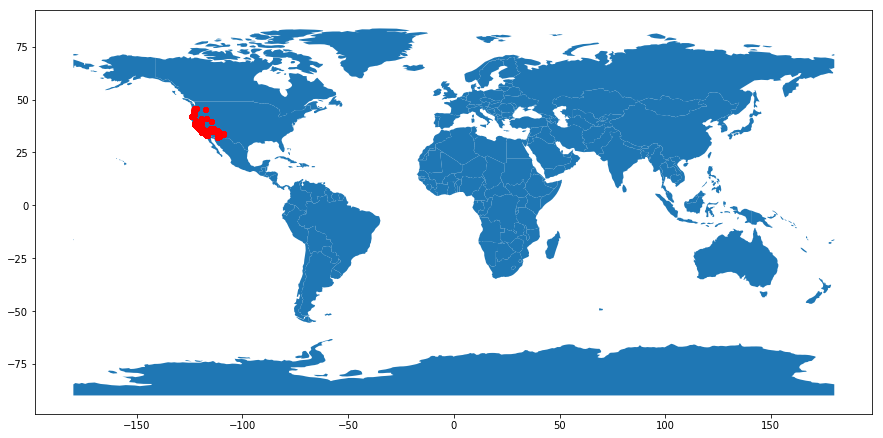

In [93]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15,15)), marker='o', color='red', markersize=10)
